/Users/pkirlin/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=3.27599e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


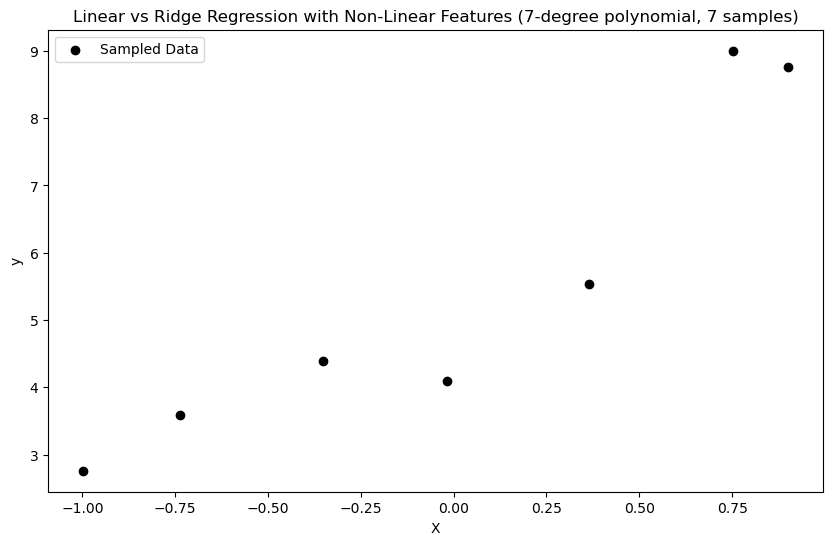

Mean Squared Error (Linear Regression with Polynomial Features, 7 samples): 0.0000
Mean Squared Error (Ridge Regression with Polynomial Features, 7 samples): 0.0000


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(7)
X = 2 * np.random.rand(100, 1) - 1
y = 4 + 5 * X + 2 * X**2 - X**3 + .05 * X**4 - 0.2 * X**5 + 0.1 * X**6 - 0.05 * X**7 + np.random.randn(100, 1)  # 7-degree polynomial with noise

# Sample only 7 points
indices = np.random.choice(np.arange(100), size=7, replace=False)
X_train, y_train = X[indices], y[indices]

# Train Linear Regression model with polynomial features
poly_features = PolynomialFeatures(degree=7)
X_train_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Train Ridge Regression model with polynomial features
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train_poly, y_train)

# Generate predictions for the entire range
X_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_pred_lin_reg = lin_reg.predict(X_plot_poly)
y_pred_ridge_reg = ridge_reg.predict(X_plot_poly)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='black', label='Sampled Data')
#plt.plot(X_plot, y_pred_lin_reg, label='Linear Regression (Poly Features)', color='red')
#plt.plot(X_plot, y_pred_ridge_reg, label='Ridge Regression (Poly Features)', color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear vs Ridge Regression with Non-Linear Features (7-degree polynomial, 7 samples)")
plt.show()

# Print Mean Squared Errors on training data
mse_lin = mean_squared_error(y_train, lin_reg.predict(X_train_poly))
mse_ridge = mean_squared_error(y_train, ridge_reg.predict(X_train_poly))
print(f'Mean Squared Error (Linear Regression with Polynomial Features, 7 samples): {mse_lin:.4f}')
print(f'Mean Squared Error (Ridge Regression with Polynomial Features, 7 samples): {mse_ridge:.4f}')